In [1]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import scipy.interpolate as spi
%matplotlib inline  
plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = [10, 6]
c = 3e8
import sys
np.set_printoptions(threshold=sys.maxsize)
import scipy.interpolate as interp

In [4]:
#plt.pcolormesh

In [2]:
%run Fraunhofer.py

In [3]:
screen = {}
screen['N'] = 500
screen['D'] = 10
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, 1.0)
InCircle(screen, center, 2.0)
ScreenFFT(screen)

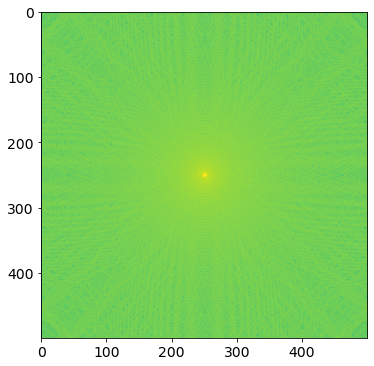

In [4]:
plt.imshow(np.log10(screen['I']))

[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


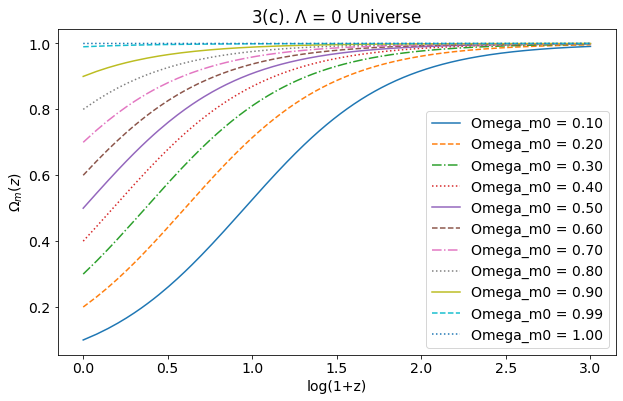

In [15]:
# 3.c
def omega_m(omega_m0, z):
    omega_m = omega_m0*(1+z)/(1+z*omega_m0)
    return(omega_m)

ls = ['-', '--', '-.', ':','-','--','-.',':','-']
z = np.linspace(0,1000,5000)
omega_m0 = np.linspace(0.1,0.9,9)
for i in range(len(omega_m0)):
    plt.plot(np.log10(1+z), omega_m(omega_m0[i], z),label='Omega_m0 = {:.2f}'.format(omega_m0[i]),ls=ls[i])
plt.plot(np.log10(1+z), omega_m(0.99, z),label='Omega_m0 = 0.99',ls='--')
plt.plot(np.log10(1+z), omega_m(1.00, z),label='Omega_m0 = 1.00',ls=':')
plt.xlabel('log(1+z)')
plt.ylabel(r'$\Omega_m(z)$')
print(omega_m0)
plt.legend()
plt.title(r'3(c). $\Lambda$ = 0 Universe')
plt.savefig('/Applications/CWRU /PHYS 325/hw2_3c.png')
# (ii) omega_m0 ~ 1 means that the matter density doesn't really evolve over time but has been a constant since the beginning of the Universe 
# which is weird considering the Universion expansion. 
# For a universe with density close to but not equal to the critical density, the discrepancy would be amplified as the universe evolves, so it 
# doesn't make sense to always have a constant density.???

the redshift of matter-cosmological constant equality is 0.326


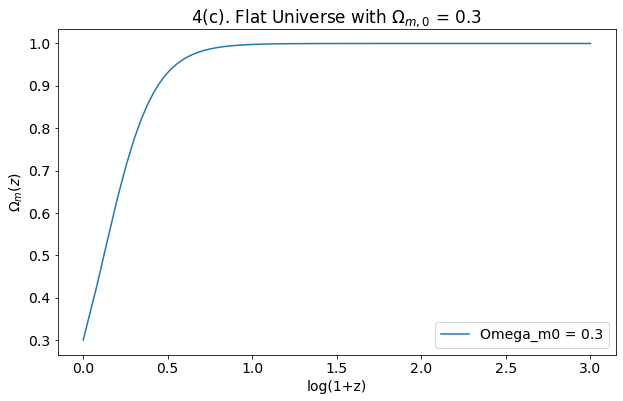

In [32]:
def omega_m(omega_m0, z):
    omega_m = omega_m0*(1+z)**3 / (z*omega_m0*(3+3*z+z**2) + 1)
    return(omega_m)

z = np.linspace(0,1000,5000)
plt.plot(np.log10(1+z), omega_m(0.3, z),label='Omega_m0 = 0.3')
plt.xlabel('log(1+z)')
plt.ylabel(r'$\Omega_m(z)$')
plt.legend()
plt.title(r'4(c). Flat Universe with $\Omega_{m,0}$ = 0.3 ')

# 4.c(i). find z corresponding to Omega matter = 0.5
spline = interp.InterpolatedUnivariateSpline(omega_m(0.3,z),z)
z_want = spline(0.5)
print('the redshift of matter-cosmological constant equality is {:.3f}'.format(z_want))
plt.savefig('/Applications/CWRU /PHYS 325/hw2_4c.png')


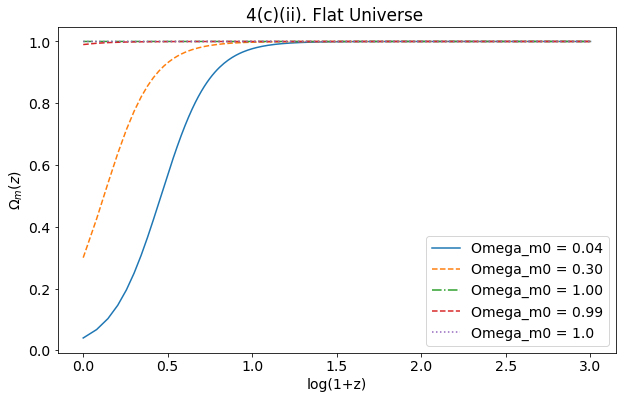

In [34]:
#4.c(ii)
ls = ['-', '--', '-.', ':','-','--','-.',':','-']
for i in range(len(omega_m0)):
    plt.plot(np.log10(1+z), omega_m(omega_m0[i], z),label='Omega_m0 = {:.2f}'.format(omega_m0[i]),ls=ls[i])
plt.plot(np.log10(1+z), omega_m(0.99, z),label='Omega_m0 = 0.99',ls='--')
plt.plot(np.log10(1+z), omega_m(1.0, z),label='Omega_m0 = 1.0',ls=':')
plt.xlabel('log(1+z)')
plt.ylabel(r'$\Omega_m(z)$')
plt.title(r'4(c)(ii). Flat Universe ')
plt.legend()
plt.savefig('/Applications/CWRU /PHYS 325/hw2_4cii.png')

# the coincidence problem not solved by omega_m0 ~ 1.0...

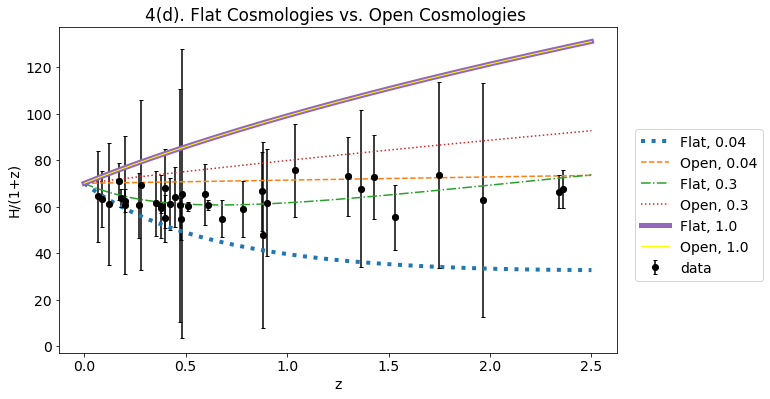

In [30]:
# 4.d
def prob4(omega_m0, z):
    H0 = 70
    func = (H0/(1+z)) * np.sqrt(z*omega_m0*(3+3*z+z**2) + 1)
    return(func)
def prob3(omega_m0, z):
    H0 = 70
    func = H0 * np.sqrt(1+z*omega_m0)
    return(func)

(H, eH, zz, ref) = np.loadtxt('/Applications/CWRU /ASTR 328/Hzdata.dat.txt', usecols=(0,1,2,3), unpack=True)

z = np.linspace(0,2.5,1000)
omega_m0 = [0.04,0.3,1.0]

plt.plot(z,prob4(omega_m0[0], z),label='Flat, 0.04',ls=':', lw=4)
plt.plot(z,prob3(omega_m0[0], z),label='Open, 0.04',ls='--')
plt.plot(z,prob4(omega_m0[1], z),label='Flat, 0.3',ls='-.')
plt.plot(z,prob3(omega_m0[1], z),label='Open, 0.3',ls=':')
plt.plot(z,prob4(omega_m0[2], z),label='Flat, 1.0',lw=5)
plt.plot(z,prob3(omega_m0[2], z),label='Open, 1.0',color='yellow',lw=1)
plt.plot(zz,H/(1+zz),'o')
plt.errorbar(zz,H/(1+zz), yerr=eH, fmt='o', color='black',ecolor='black', capsize=2, label='data')
#plt.legend()
plt.xlabel('z')
plt.ylabel('H/(1+z)')
plt.title(r'4(d). Flat Cosmologies vs. Open Cosmologies ')
plt.legend(bbox_to_anchor=(1.02, 0.2),loc="lower left", fontsize = 14)
plt.savefig('/Applications/CWRU /PHYS 325/hw2_4d.png')


In [3]:
def Initialize(screen):
    # must run this first
    # It modifies the screen dictionary in place.
    # Before calling this, you have to first define 
    #   screen['N'] == number of pixels across the screen, and
    #   screen['D'] == the physical length across the screen.
    # These two values are used to populate various new elements in the dictionary 
    # associated with the screen pixels and k-values of the FFT.
    #
    n = screen['N']
    xvec = np.linspace(0,screen['D'],n)
    screen['X'] = np.tile(xvec,(len(xvec),1))
    screen['Y'] = screen['X'].T #np.flipud(screen['X'].T)
    screen['E'] = np.ones((n,n))
    dk = 2*np.pi/screen['D'] #the separation in k-space corresponding to the separation in physical space
    screen['dk']=dk
    kvec = dk*np.fft.fftfreq(n)*n #largest k corresponds to smallest physical resolution on the aperture
    screen['kvec'] = kvec
    screen['kx']= np.fft.fftshift(np.tile(kvec,(kvec.size,1)))
    screen['ky']= screen['kx'].T #np.flipud(screen['kx'].T)
    screen['kap']= np.sqrt(screen['kx']**2 + screen['ky']**2)  # k vector in aperture plane (#radial distance at each point)
   

In [4]:
def MultByGaussian(screen, center, sigma):
    # center must be a tuple, (xcenter,ycenter)
    x0 = center[0]
    y0 = center[1]
    R = np.sqrt((screen['X']-x0)**2 + (screen['Y']-y0)**2)
    screen['E']=screen['E']*np.exp(-(R**2)/(2*sigma**2))
    
def InCircle(screen,center,radius):
    # Must have called makeXY first.
    # center must be a tuple, (xcenter,ycenter) in meters
    # radius in meters
    x0 = center[0]
    y0 = center[1]
    R = np.sqrt((screen['X']-x0)**2 + (screen['Y']-y0)**2)
    cut_ap = np.where(R<radius,1,0) # multiplication factor: in-circle: 1; out-circle: 0
    screen['E']=screen['E']*cut_ap

def CircleAtten(screen,center,radius,factor):
    x0 = center[0]
    y0 = center[1]
    R = np.sqrt((screen['X']-x0)**2 + (screen['Y']-y0)**2)
    atten_ap = np.where(R<radius,factor,1) #factor: multiplication factor of in-circle.
    screen['E']=screen['E']*atten_ap
    
def ScreenFFT(screen):
    screen['FFT_E'] = np.fft.fftshift(np.fft.fft2(screen['E']))
    screen['I'] = np.abs(screen['FFT_E'])**2

def singleslit(screen,w,h,factor):
    x1 = screen['D']/2-w/2
    x2 = screen['D']/2+w/2
    y1 = screen['D']/2-h/2
    y2 = screen['D']/2+h/2
    slit = np.where((screen['X']>x1)&(screen['X']<x2)&(screen['Y']>y1)&(screen['Y']<y2), factor, 1)
    screen['E']=screen['E']*slit
def doubleslit(screen, w, h ,d, factor):
    x1l = screen['D']/2-d/2-w/2
    x1r = screen['D']/2-d/2+w/2
    x2l = screen['D']/2+d/2-w/2
    x2r = screen['D']/2+d/2+w/2
    y1 = screen['D']/2-h/2
    y2 = screen['D']/2+h/2
    xposition = ((screen['X']>x1l)&(screen['X']<x1r)) | ((screen['X']>x2l)&(screen['X']<x2r))
    yposition = ((screen['Y']>y1)&(screen['Y']<y2))
    slits = np.where((xposition&yposition), factor, 1)
    screen['E']=screen['E']*slits



In [9]:
screen = {}
screen['N'] = 1000
screen['D'] = 10
Initialize(screen)
singleslit(screen,0.02,3,5)
#doubleslit(screen, 0.02,3,0.2,5)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, 1.0)
InCircle(screen, center, 2.0)
ScreenFFT(screen)

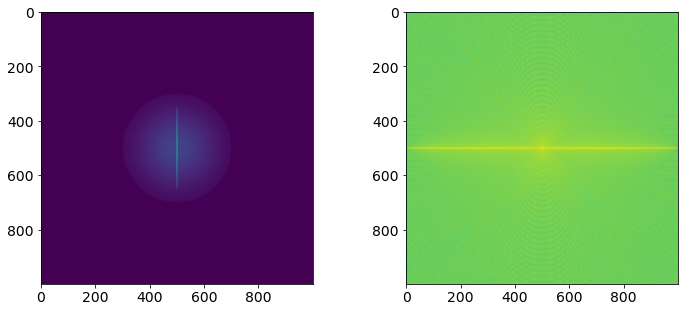

In [10]:
fig = plt.figure(figsize=(12,5))
ax1 = fig.add_subplot(121)
ax1.imshow(screen['E'])
#plt.xlim(400,600)
#plt.ylim(400,600)
ax2 = fig.add_subplot(122)
ax2.imshow(np.log10(screen['I']))

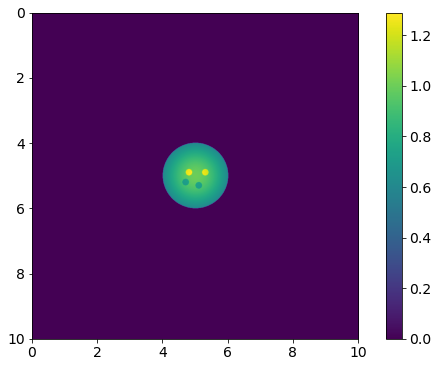

In [12]:
screen = {}
screen['N'] = 1000
screen['D'] = 10
Initialize(screen)
center = (screen['D']/2, screen['D']/2)
MultByGaussian(screen, center, 1.0)
InCircle(screen, center, 1.0)
c2 = (center[0]-0.2, center[1]-0.1)
CircleAtten(screen,c2,0.1,1.3)
c2 = (center[0]+0.1, center[1]+0.3)
CircleAtten(screen,c2,0.1,1/1.3)
c2 = (center[0]+0.3, center[1]-0.1)
CircleAtten(screen,c2,0.1,1.3)
c2 = (center[0]-0.3, center[1]+0.2)
CircleAtten(screen,c2,0.1,1/1.3)
ScreenFFT(screen)
plt.imshow(screen['E'],extent=(0,screen['D'],screen['D'],0))
plt.colorbar()

In [14]:
def CDpanelgap_mask(screen):
    # SO secondary (from image) has 9 panels in "x" across about a 6m aperture, 
    # so they are 0.667 meters in size.
    # We build a 5m mirror with similar panel sizes here, not trying to be exact.
    #
    slit_centers1 = np.arange(0.0,2.5,0.667)
    slit_centers2 = -slit_centers1[1:]
    slit_centers = np.concatenate((slit_centers2[::-1],slit_centers1))
    print(slit_centers)
    slit_width = 0.0007 #mm
    #
    pix_size = screen['D']/screen['N']
    xvec = np.linspace(-screen['D']/2,screen['D']/2,screen['N'])  # centered at zero
    onerow = np.ones(len(xvec))
    
    if pix_size >= slit_width:
        print("Pixel size >= slit width:  Removing one column/row for each slit.")
        for ii in range(len(slit_centers)):
            slitlocator = np.abs(xvec - slit_centers[ii])
            slitloc = np.argmin(slitlocator)
            onerow[slitloc] = 0
    else:
        print("Pixel size <= slit width:  Removing multiple columns/rows for each slit.")
        for ii in range(len(slit_centers)):
            slitlocator = np.abs(xvec - slit_centers[ii])
            slitloc = np.where(slitlocator < (pix_size/1.9))
            onerow[slitloc] = 0
    
    plt.plot(onerow)
    gapmask_x = np.tile(onerow,(len(onerow),1)) 
    gapmask_y = gapmask_x.T
    gapmask = gapmask_x*gapmask_y
    #screen['E']=screen['E']*gapmask
    return gapmask

def Project_I_on_thetagrid(theta_vec,screen,lam):
    # Run after you've calculated the intensity as a function of kx, ky.
    # thetavec = 1D array of positions to be used for thetax, and for thetay
    #
    # Make 2D arrays of thetax, thetay coordinate for our map
    # We use the "_grid" suffix to indicate things that are 2D arrays associated
    # with the (new) thetax_grid, thetay_grid created next.
    N_thetagrid = len(theta_vec)
    thetax_grid, thetay_grid = np.meshgrid(theta_vec,theta_vec)
    thetay_grid = np.flipud(thetay_grid)
    #
    kphot = 2*np.pi/lam    # photon k vector.
    #
    # Find kx and ky at each (thetax,thetay) grid spot
    #
    #kx_grid = kphot*thetax_grid/(np.pi/2) # fix this
    #ky_grid = kphot*thetay_grid/(np.pi/2)
    kx_grid = kphot*np.sin(thetax_grid) 
    ky_grid = kphot*np.sin(thetay_grid)
    #
    # Now look at the original kx,ky map of our FT screen.
    #
    I_grid = np.zeros((N_thetagrid, N_thetagrid))
    
    dk = screen['kx'][0,1]-screen['kx'][0,0]
    for xx in range(N_thetagrid):
        for yy in range(N_thetagrid):
            kx = kx_grid[yy,xx]
            ky = ky_grid[yy,xx]
            #
            nx = kx/dk + screen['N']/2  # what element is this in the screen's kx,ky
            ny = ky/dk + screen['N']/2
            #
            # find the four values of kx,ky that surround
            nx1 = int(np.floor(nx))
            nx2 = int(np.ceil(nx))
            ny1 = int(np.floor(ny))
            ny2 = int(np.ceil(ny))
            # Go through four points surrounding our grid point's position and take weighted average.
            numsum = 0
            denomsum = 0
            for pt in [(nx1,ny1), (nx1,ny2), (nx2,ny1), (nx2,ny2)]:
                rr2 = (kx - screen['kx'][pt[0],pt[1]])**2 + (ky - screen['ky'][pt[0],pt[1]])**2
                w = 1/rr2
                numsum += w*screen['I'][pt[0],pt[1]]
                denomsum += w
                #numsum += screen['I'][pt[0],pt[1]]
                #denomsum += 1
            I_grid[xx,yy] = numsum/denomsum
            #I_grid[xx,yy] = screen['I'][nx2,ny1]
        
    return I_grid

In [15]:
lam = 0.002 #mm wavelength
kphot = 2*np.pi/lam
thetamaxdeg = 2.0
thetamax = 2*np.pi/180. # 2 degrees in radians
theta_vec = np.arange(-thetamax,thetamax,0.0005) 
II = Project_I_on_thetagrid(theta_vec,screen,lam) 
#plt.imshow(np.log10(II), interpolation = None) 

#plt.imshow(np.log10(screen['I']/np.max(screen['I'])), vmin=-5,interpolation = None,extent=[-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg]) 
plt.imshow(np.log10(II/np.max(II)), vmin=-5,interpolation = None,extent=[-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg]) 
plt.colorbar()


IndexError: index 1586 is out of bounds for axis 1 with size 1000

(200,)
0.6283185307179622
(-1.07e+02, -1.07e+02), (-1.08e+02, -1.08e+02) : (78, 78), 3.88e-01, 3.88e-01, 7.76e-01)
(-1.07e+02, -1.07e+02), (-1.07e+02, -1.08e+02) : (78, 79), 3.13e-05, 3.88e-01, 3.88e-01)
(-1.07e+02, -1.07e+02), (-1.08e+02, -1.07e+02) : (79, 78), 3.88e-01, 3.13e-05, 3.88e-01)
(-1.07e+02, -1.07e+02), (-1.07e+02, -1.07e+02) : (79, 79), 3.13e-05, 3.13e-05, 6.27e-05)


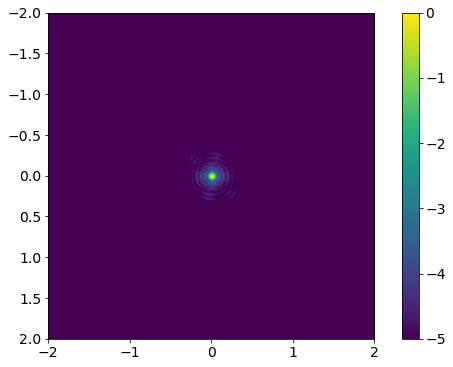

In [36]:
lam = 0.002 #mm wavelength
kphot = 2*np.pi/lam
# 
thetamaxdeg = 2.0
thetamax = thetamaxdeg*np.pi/180. # 0.2 degrees
dtheta = thetamax/100
theta_vec = np.arange(-thetamax,thetamax,dtheta) 
print(theta_vec.shape)

N_thetagrid = len(theta_vec)
thetax_grid, thetay_grid = np.meshgrid(theta_vec,theta_vec)
#thetay_grid = np.flipud(thetay_grid)
#
kphot = 2*np.pi/lam    # photon k vector.
#
# Find kx and ky at each (thetax,thetay) grid spot
#
# kx_grid = kphot*thetax_grid/(np.pi/2)
# ky_grid = kphot*thetay_grid/(np.pi/2)
kx_grid = kphot*np.sin(thetax_grid) # fix this
ky_grid = kphot*np.sin(thetay_grid)
#
# Now look at the original kx,ky map of our FT screen.
#
I_grid = np.zeros((N_thetagrid, N_thetagrid))

dk = screen['kx'][0,1]-screen['kx'][0,0]
print(dk)
for xx in range(N_thetagrid):
    for yy in range(N_thetagrid):
        kx = kx_grid[yy,xx]
        ky = ky_grid[yy,xx]
        #
        nx = kx/dk + screen['N']/2  # what element is this in the screen's kx,ky
        ny = ky/dk + screen['N']/2

        #
        # find the four values of kx,ky that surround
        nx1 = int(np.floor(nx))
        nx2 = int(np.ceil(nx))
        ny1 = int(np.floor(ny))
        ny2 = int(np.ceil(ny))
        # Go through four points surrounding our grid point's position and take weighted average.
        numsum = 0
        denomsum = 0
        for pt in [(ny1,nx1), (ny1,nx2), (ny2,nx1), (ny2,nx2)]:
            xx2 = (kx - screen['kx'][pt[0],pt[1]])**2
            yy2 = (ky - screen['ky'][pt[0],pt[1]])**2
            rr2 = xx2 + yy2
            w = 1/rr2
            numsum += w*screen['I'][pt[0],pt[1]]
            denomsum += w
            if (xx == 2) and (yy == 2):
                print('({0:3.2e}, {1:3.2e}), ({2:3.2e}, {3:3.2e}) : ({4:2d}, {5:2d}), {6:3.2e}, {7:3.2e}, {8:3.2e})'.format(kx,ky,screen['kx'][pt[0],pt[1]],screen['ky'][pt[0],pt[1]],pt[0],pt[1],xx2,yy2,rr2))
            #numsum += screen['I'][pt[0],pt[1]]
            #denomsum += 1
        I_grid[xx,yy] = numsum/denomsum

plt.imshow(np.log10(I_grid/np.max(I_grid)), vmin=-5,interpolation = None,extent=[-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg]) 
plt.colorbar()
#print(theta_vec)

In [29]:
kx_grid[0].max()

69.11503837897507

In [30]:
screen['kx'].max()

156.4513141487717

In [154]:
I_0 = I_grid

In [50]:
I_1 = I_grid

In [160]:
Idiff = I_1 - I_0
print(Idiff)

[[-1663.12099987 -1774.24002444 -1947.2458695  ...  5749.72137313
   7169.1885546   8518.259969  ]
 [-1552.21725035 -1612.04252637 -1338.9849844  ...  6490.46941224
   7941.95106516  8769.83735374]
 [ -847.95052224 -1081.72994647  -941.83656469 ...  6385.07227869
   7701.95422907  8516.45482003]
 ...
 [10733.0769526   9045.13989403  7845.21974937 ...  -491.59744299
   -297.74665862  -117.41431418]
 [ 9620.30115131  8516.45482004  7701.95422909 ...  -951.58101526
   -941.83656467 -1081.72994645]
 [ 9016.63909219  8769.83735374  7941.95106519 ... -1261.36132258
  -1338.98498439 -1612.04252636]]


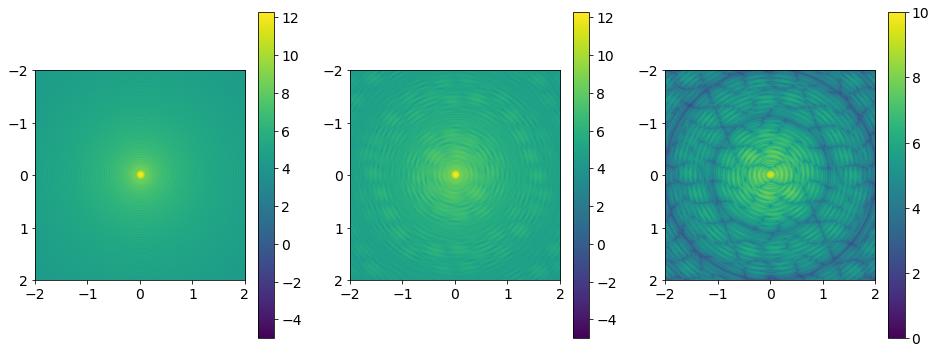

In [163]:
plt.rcParams['figure.figsize'] = [16, 6]
plt.subplot(1,3,1)
plt.imshow(np.log10(np.abs(I_0)),vmin=-5,interpolation = None,extent=[-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg])
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(np.log10(np.abs(I_1)),vmin=-5,interpolation = None,extent=[-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg])
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(np.log10(np.abs(Idiff)),vmin=0,vmax=10,interpolation = None,extent=[-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg])
plt.colorbar()

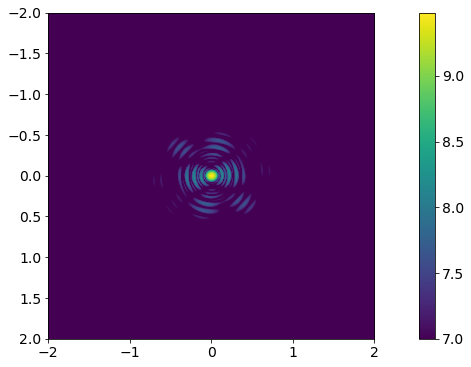

In [166]:
plt.imshow(np.log10(np.abs(Idiff)),vmin=7,interpolation = None,extent=[-thetamaxdeg,thetamaxdeg,thetamaxdeg,-thetamaxdeg])
plt.colorbar()

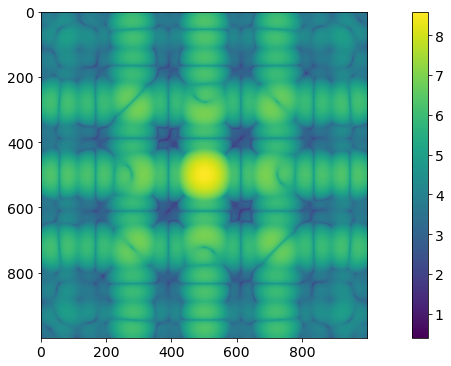

In [172]:
psd0 = np.fft.fftshift(np.abs(np.fft.fft2(I_0))) # exactly the same thing as ifft2. does iFFT to transfer back to the aperture coordinates?
psd1 = np.fft.fftshift(np.abs(np.fft.fft2(I_1)))
plt.imshow(np.log10(np.abs(psd0)))
plt.colorbar()


119.75999999999462


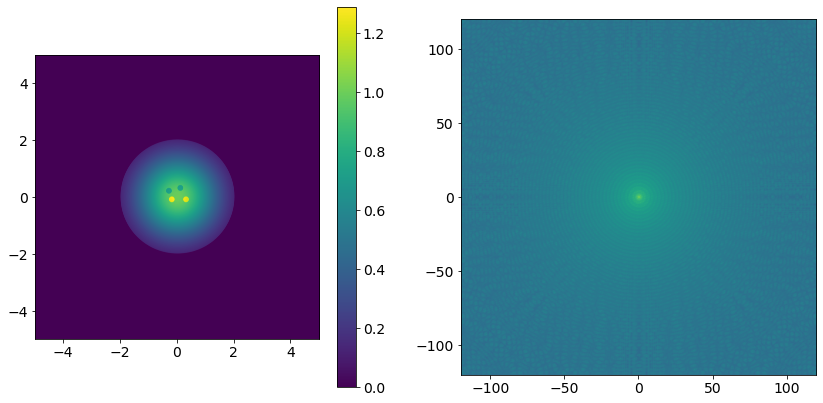

In [183]:
def PlotScreenAndFFT(screen):
    d2 = screen['D']/2
    #
    # Plot screen E-field
    fig,axs = plt.subplots(1,2)
    aa = axs[0].imshow(np.real(screen['E']),origin='lower',extent=[-d2,d2,-d2,d2])
    fig.colorbar(aa,ax=axs[0])
    #
    theta_max = np.max(screen['theta_vec_arcmin'])
    print(theta_max)
    bb = axs[1].imshow(np.log10(np.abs(screen['FFT_E'])),origin='lower',extent=[-theta_max,theta_max,-theta_max,theta_max])
    theta = np.linspace(0,2*np.pi,100)
    
    #plt.plot(kmax*np.cos(theta),kmax*np.sin(theta),'r')
    #axs[1].set_xlim(-10,10)
    #axs[1].set_ylim(-10,10)
    #fig.colorbar(bb,ax=axs[1])

theta_vec = np.arange(-thetamax,thetamax,dtheta) 
screen['theta_vec_arcmin'] = np.degrees(theta_vec)*60
plt.rcParams['figure.figsize'] = [14, 7]
PlotScreenAndFFT(screen)

In [4]:
3.086e19/75/(365*24*3600)/1e10

1.3047522408253003

In [8]:
2*1300/3e8*86/12*(365*24*3600)

1958.7359999999999

In [10]:
0.5*6.21e-5*(365*24*3600)**2/1e10

3.0879824140800003

In [3]:
from tensorflow.python.client import device_lib

def get_available_cpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'CPU']
get_available_gpus()

['/device:CPU:0']

In [6]:
import torch

In [4]:
plt.quiver?

Signature: plt.quiver(*args, data=None, **kw)
Docstring:
Plot a 2D field of arrows.

Call signature::

  quiver([X, Y], U, V, [C], **kw)

Where *X*, *Y* define the arrow locations, *U*, *V* define the arrow
directions, and *C* optionally sets the color.

**Arrow size**

The default settings auto-scales the length of the arrows to a reasonable size.
To change this behavior see the *scale* and *scale_units* parameters.

**Arrow shape**

The defaults give a slightly swept-back arrow; to make the head a
triangle, make *headaxislength* the same as *headlength*. To make the
arrow more pointed, reduce *headwidth* or increase *headlength* and
*headaxislength*. To make the head smaller relative to the shaft,
scale down all the head parameters. You will probably do best to leave
minshaft alone.

**Arrow outline**

*linewidths* and *edgecolors* can be used to customize the arrow
outlines.

Parameters
----------
X, Y : 1D or 2D array-like, optional
    The x and y coordinates of the arrow location